In [1]:
import numpy as np
from sparse_ir import FiniteTempBasis, MatsubaraSampling
from sparse_ir.dlr import DiscreteLehmannRepresentation

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 15

In [2]:
wmax = 1.0
lambda_ = 1e+4
beta = lambda_/wmax

basis = FiniteTempBasis("F", beta, wmax, eps=1e-15)
print(basis.size)

104

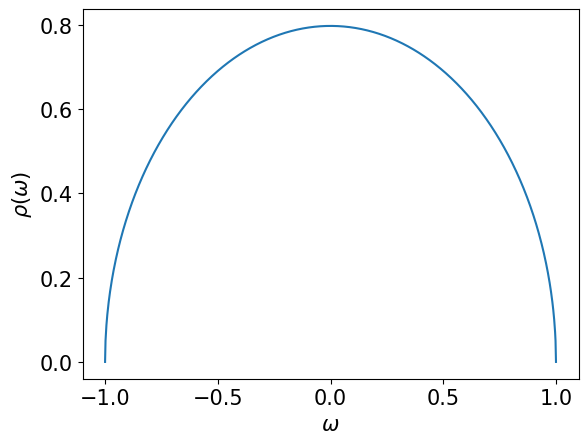

In [3]:
rho = lambda omega: np.sqrt(1-omega**2)/np.sqrt(0.5*np.pi)

omega = np.linspace(-wmax, wmax, 1000)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\rho(\omega)$')
plt.plot(omega, rho(omega))
plt.show()

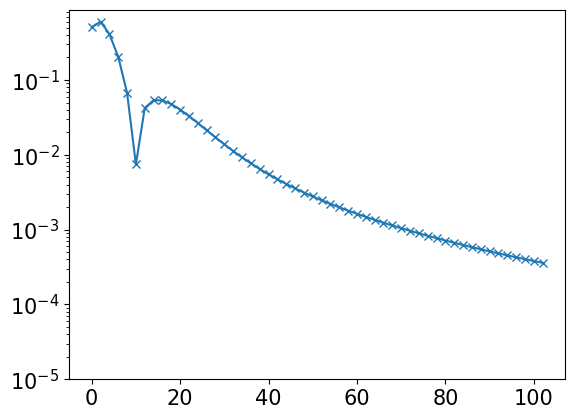

In [4]:
rhol = basis.v.overlap(rho, -wmax, wmax)
ls = np.arange(basis.size)
plt.semilogy(ls[::2], np.abs(rhol)[::2], marker="x")
plt.ylim([1e-5, None])
plt.show()

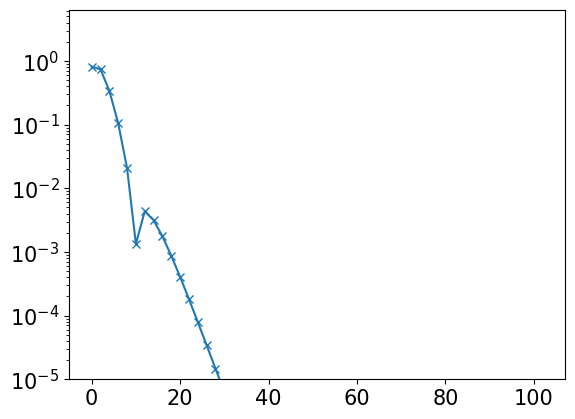

In [5]:
gl = - basis.s * rhol
plt.semilogy(ls[::2], np.abs(gl)[::2], marker="x")
plt.ylim([1e-5, None])
plt.show()

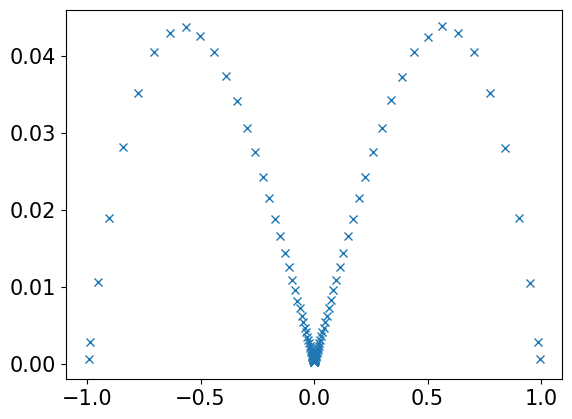

In [6]:
dlr = DiscreteLehmannRepresentation(basis)

# To DLR
g_dlr = dlr.from_IR(gl)

plt.plot(dlr.sampling_points, g_dlr, marker="x", ls="")
plt.show()

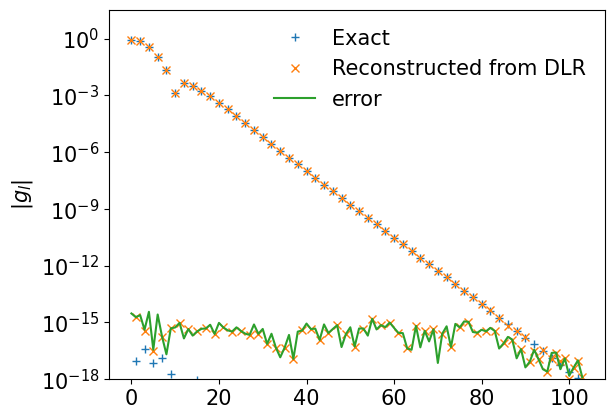

In [7]:
# Transform back to IR from SPR
gl_reconst = dlr.to_IR(g_dlr)

plt.semilogy(np.abs(gl), label="Exact", ls="", marker="+")
plt.semilogy(np.abs(gl_reconst), label="Reconstructed from DLR", ls="", marker="x")
plt.semilogy(np.abs(gl-gl_reconst), label="error")
plt.ylim([1e-18,None])
plt.ylabel("$|g_l|$")
plt.legend(loc="best", frameon=False)
plt.show()

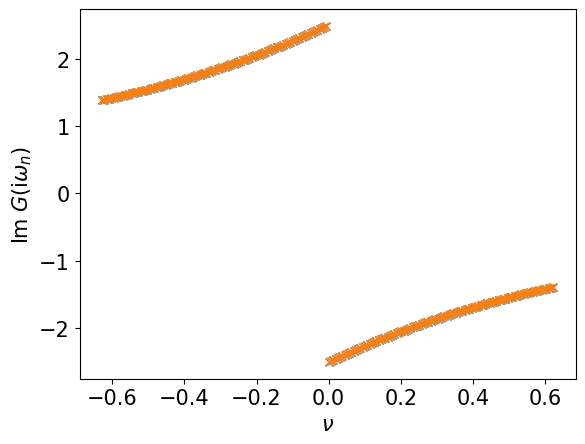

In [8]:
v = 2*np.arange(-1000, 1000, 10) + 1
iv = 1j * v * (np.pi/beta)

transmat = 1/(iv[:,None] - dlr.sampling_points[None,:])
giv = transmat @ g_dlr

giv_exact = MatsubaraSampling(basis, v).evaluate(gl)

plt.plot(iv.imag, giv_exact.imag, ls="", marker="x", label="Exact")
plt.plot(iv.imag, giv.imag, ls="", marker="x", label="Reconstructed from SPR")
plt.xlabel(r"$\nu$")
plt.ylabel(r"Im $G(\mathrm{i}\omega_n)$")

plt.show()